In [43]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# Index, Mouse ID, Drug
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load) 

# Index, Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset (Mouse ID)
data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")

data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [44]:
### Tumor Response to Treatment ###
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

mean_data = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
mean_data = pd.DataFrame(mean_data).reset_index()
mean_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [45]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_data = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
sem_data = pd.DataFrame(sem_data).reset_index()
sem_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [46]:
# Minor Data Munging to Re-Format the Data Frames

mean_data_w = data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack()
sem_data_w = data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].sem().unstack()
mean_data_w.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


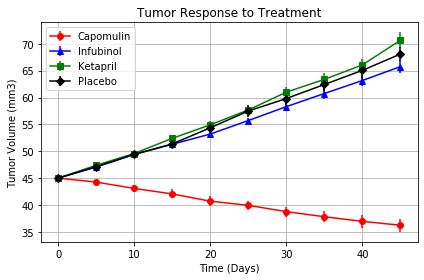

In [47]:
# Generate the Plot (with Error Bars): Capomulin, Infubinol, Ketapril, and Placebo

x_axis = mean_data_w.index.tolist()

c_mean = mean_data_w["Capomulin"].tolist()
c_sem = sem_data_w["Capomulin"].tolist()

i_mean = mean_data_w["Infubinol"].tolist()
i_sem = sem_data_w["Infubinol"].tolist()

k_mean = mean_data_w["Ketapril"].tolist()
k_sem = sem_data_w["Ketapril"].tolist()

p_mean = mean_data_w["Placebo"].tolist()
p_sem = sem_data_w["Placebo"].tolist()

fig, ax = plt.subplots()

Capomulin = ax.errorbar(x_axis, c_mean, c_sem, fmt="-ro", label="Capomulin")
Infubinol = ax.errorbar(x_axis, i_mean, i_sem, fmt="-b^", label="Infubinol")
Ketapril = ax.errorbar(x_axis, k_mean, k_sem, fmt="-gs", label="Ketapril")
Placebo = ax.errorbar(x_axis, p_mean, p_sem, fmt="-kD", label="Placebo")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="upper left")
plt.grid()

plt.tight_layout()
plt.savefig("Tumor_Response_to_Treatment.png")
plt.show()

In [48]:
### Metastatic Response to Treatment ###
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_data_w = data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack()
mean_data_w = data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].sem().unstack()
mean_data_w.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [49]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_sem_data = data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
met_sem_data = pd.DataFrame(met_sem_data)
met_sem_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [50]:
# Minor Data Munging to Re-Format the Data Frames

met_mean_data_w = data.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack()
met_sem_data_w = data.groupby(['Timepoint','Drug'])['Metastatic Sites'].sem().unstack()
met_mean_data_w.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


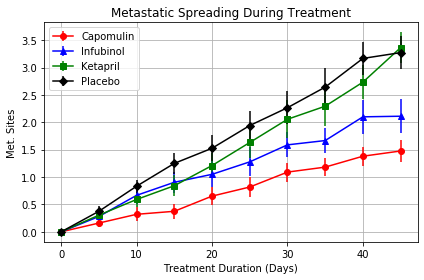

In [51]:
# Generate the Plot (with Error Bars)

met_x_axis = met_mean_data_w.index.tolist()

met_c_mean = met_mean_data_w["Capomulin"].tolist()
met_c_sem = met_sem_data_w["Capomulin"].tolist()

met_i_mean = met_mean_data_w["Infubinol"].tolist()
met_i_sem = met_sem_data_w["Infubinol"].tolist()

met_k_mean = met_mean_data_w["Ketapril"].tolist()
met_k_sem = met_sem_data_w["Ketapril"].tolist()

met_p_mean = met_mean_data_w["Placebo"].tolist()
met_p_sem = met_sem_data_w["Placebo"].tolist()

fig, ax = plt.subplots()

Capomulin = ax.errorbar(met_x_axis, met_c_mean, met_c_sem, fmt="-ro", label="Capomulin")
Infubinol = ax.errorbar(met_x_axis, met_i_mean, met_i_sem, fmt="-b^", label="Infubinol")
Ketapril = ax.errorbar(met_x_axis, met_k_mean, met_k_sem, fmt="-gs", label="Ketapril")
Placebo = ax.errorbar(met_x_axis, met_p_mean, met_p_sem, fmt="-kD", label="Placebo")

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spreading During Treatment")
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="upper left")
plt.grid()

plt.tight_layout()
plt.savefig("Metastatic_spreading_During_Treatment.png")
plt.show()

In [52]:
### Survival Rates ###
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

sur_data = data.groupby(['Drug','Timepoint'])['Mouse ID'].count()
sur_data = pd.DataFrame(sur_data).reset_index()
sur_data.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [53]:
# Minor Data Munging to Re-Format the Data Frames

sur_data_w = data.groupby(['Timepoint','Drug'])['Mouse ID'].count().unstack()
sur_data_w.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


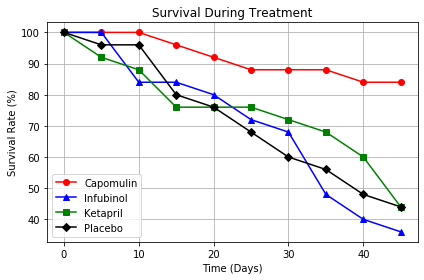

In [54]:
# Generate the Plot (Accounting for percentages)

sur_x_axis = sur_data_w.index.tolist()

sur_c = (sur_data_w["Capomulin"].astype(int)/sur_data_w.ix[0, "Capomulin"])*100

sur_i = (sur_data_w["Infubinol"].astype(int)/sur_data_w.ix[0, "Infubinol"])*100

sur_k = (sur_data_w["Ketapril"].astype(int)/sur_data_w.ix[0, "Ketapril"])*100

sur_p = (sur_data_w["Placebo"].astype(int)/sur_data_w.ix[0, "Placebo"])*100

fig, ax = plt.subplots()

Capomulin = ax.errorbar(sur_x_axis, sur_c, fmt="-ro", label="Capomulin")
Infubinol = ax.errorbar(sur_x_axis, sur_i, fmt="-b^", label="Infubinol")
Ketapril = ax.errorbar(sur_x_axis, sur_k, fmt="-gs", label="Ketapril")
Placebo = ax.errorbar(sur_x_axis, sur_p, fmt="-kD", label="Placebo")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="lower left")
plt.grid()

plt.tight_layout()
plt.savefig("Survival_During_Treatment.png")
plt.show()

In [55]:
### Summary Bar Graph ###
# Calculate the total % tumor volume change for each drug

vol_ch = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().unstack()
vol_ch['Percent Change'] = -((vol_ch[0] - vol_ch[45]) / vol_ch[0]) * 100
vol_ch = vol_ch['Percent Change']
vol_ch

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Percent Change, dtype: float64

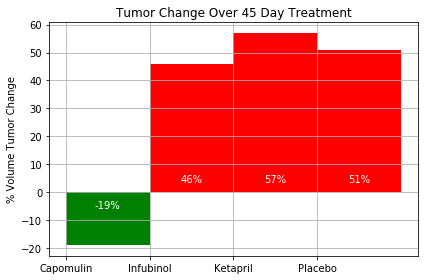

In [144]:
# Capomulin, Infubinol, Ketapril, and Placebo

y_axis = [int(vol_ch[0]), int(vol_ch[2]), int(vol_ch[3]), int(vol_ch[5])]
#[-19, 46, 57, 51]

x_axis = x_axis = np.arange(len(y_axis))

color = []
b_x = 0.5

for x in y_axis:
    if x > 0:
        color += 'r'
        x = str(x)+"%"
        b_x += 1.0
        plt.text(b_x, 3, x, ha='center', va='bottom', color='white')
    
    else:
        color += 'g'
        x = str(x)+"%"
        plt.text(b_x, -6.5, x, ha='center', va='bottom', color='white')
        
plt.bar(x_axis, y_axis, width=1, color=color, align="edge")

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Volume Tumor Change")
        
plt.tight_layout()
plt.savefig("Tumor_Change.png")
plt.show()

You must include a written description of three observable trends based on the data.

1. Of the four drugs that were compared, Capomulin was the most effective at reducing tumor size, metastatic speading and had the most favorable outcome in terms of survivability. Reduction in tumor size and metastatic spreading is correlated to the survivability rate.

2. The graphical results of Ketapril and Infubinol were similar to the Placebo indicating they minimal effect vs placebo. Infubinol was marginally more effectie than the placebo at reducing tumor size and metastaic spreading; however, it had a lower survivability rate.

3. None of the drugs prevented metastatic spreading.


In [ ]:
# add X and Y Axis Limits